In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from scipy import stats
from env import get_connection
from sqlalchemy import text, create_engine

# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.

1) Has the network latency gone up since we switched internet service providers?

Null hypothesis : There has been no changes to the network latency since we switched internet providers.

Alternate hypothesis : The network latency has gone up since we switched internet service providers. 

True Positive : It is indeed true that the network latency has gone up since switching providers because the analysis detects a significant increase in network latency.

True Negative : It is true that the latency has not changed since switching providers because the analysis correctly finds no significant increase in network latency.  

Type I Error : The analysis incorrectly concludes that there is significant increase in network latency, but in reality, the latency has not changed since switching providers.

Type II Error : The analysis fails to detect a significant increase in network latency, but in reality, the latenct has gone up since switching providers.

2) Is the website redesign any good?

Null hypothesis : The website redesign has not played a significant role in improving performance or user engagement.

Alternative hypothesis : The website redesign has led to improved performance and user engagement.

True Positive : The website redesign is indeed effective because the evaluation indicates a significant improvement in performance and user engagement.

True Negative : The website redesign has not been effective because the evaluation correctly concludes that there is no significant improvement in performance and user engagement.

Type I : The evaluation is incorrect because it suggests a significant improvement in performance and user engagement even though there is no actual improvement.

Type II : The evaluation fails to detect a significant improvement in performance or user engagement, but the website redesign is actually effective

3) Is our television ad driving more sales?

Null hypothesis : Our television ad has not played a crucial in driving up overall sales.

Alternative hypothesis : Our television ad has led to a significant rise in overall sales.

True Positive : Based on our analysis, it is evident that our television ad has played a crucial role in driving up overall sales.

True Negative : It is evident that our television ad has not not led to a signiificant rise in overall sales, based on our analysis.

Type I : The analysis does not support the proposition that our television ad has resulted in a significant increase in overall sales, given that there has been no observed improvement in the overall sales figures.

Type II : The analysis fails to detect a significant increase in sales, despite the television ad being actually effective in drving up sales.

# Comparison of Groups

1) Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student
Uses a Macbook	        49	  20

Doesn't Use A Macbook	1	  30

Null hypothesis: Using a macbook and being a condeup student are independent of each other.
    
Alternative hypothesis: Using a macbook and being a codeup student are dependent of each other.

In [2]:
#Creating a table
data = {
    'Codeup Student': [49, 1],
    'Not code up student': [20, 30],
}

index = ['Uses a Macbook', 'Does not Use A Macbook']

In [3]:
#creating a dataframe
cs = pd.DataFrame(data, index=index)
cs

,Codeup Student,Not code up student
Uses a Macbook,49,20
Does not Use A Macbook,1,30


In [4]:
#chi-square test of cs dataframe
chi, p, degf, exp = stats.chi2_contingency(cs)

In [5]:
#hypothesis test
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis. There appears to be a relationship


Null hypothesis : There is no association between suvs and 4wd

Alternative : There is an association between suvs and 4wd

2) Choose another 2 categorical variables from the mpg dataset.

State your null and alternative hypotheses.

State your alpha.

Perform a chi2 test of independence.

State your conclusion

In [8]:
#loading mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
#creating two categorical columns(suvs vs non-suvs) from the class column.
mpg['suv_vs_nonsuv'] = np.where(mpg['class'].str.startswith('s'), 'suv', 'not_suv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,suv_vs_nonsuv
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,not_suv
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,not_suv
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,not_suv
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,not_suv
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,not_suv


In [10]:
#creating two categorical columns(4wd vs forward or rear wheel drive) from the drv column.
mpg['4wd_vs_f_or_rwd'] = np.where(mpg['drv'].str.startswith('4'), '4wd', 'f_or_rwd')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,suv_vs_nonsuv,4wd_vs_f_or_rwd
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,not_suv,f_or_rwd
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,not_suv,f_or_rwd
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,not_suv,f_or_rwd
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,not_suv,f_or_rwd
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,not_suv,f_or_rwd


In [11]:
#creating a crosstab of the suvs vs non-suvs column and the 4wd vs forward or rear wheel drive column
c_drv = pd.crosstab(mpg.suv_vs_nonsuv, mpg['4wd_vs_f_or_rwd'])
c_drv

4wd_vs_f_or_rwd,4wd,f_or_rwd
suv_vs_nonsuv,,
not_suv,48,89
suv,55,42


In [12]:
#chi-square test of c_drv crosstab
chi, p, degf, exp = stats.chi2_contingency(c_drv)

In [13]:
#hypothesis test 
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis. There appears to be a relationship


3) Use the data from the employees database to answer these questions:

a) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Null hypothesis: An employee's gender is independent of whether the employee works in sales or marketing.

Alternative hypothesis: An employee's gender is dependent of whether the employee works in sales or marketing.

In [14]:
#loading the employees database
def get_db_url(database):
    return get_connection(database)

In [15]:
url = get_db_url('employees')

In [16]:
engine =  create_engine(url)

In [24]:
#loading a query from sql
query = '''
        SELECT *
        FROM employees
        LEFT JOIN dept_emp ON dept_emp.emp_no = employees.emp_no
        LEFT JOIN departments ON departments.dept_no = dept_emp.dept_no
        WHERE to_date > CURDATE() AND (dept_name = 'sales' OR dept_name = 'marketing')
        '''

In [25]:
text_query = text(query)

In [26]:
#reading the sql table and calling the first five rows
df = pd.read_sql(text(query), engine.connect())
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,d001,1993-08-03,9999-01-01,d001,Marketing
1,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,10058,d001,1988-04-25,9999-01-01,d001,Marketing
2,10140,1957-03-11,Yucel,Auria,F,1991-03-14,10140,d001,1991-03-14,9999-01-01,d001,Marketing
3,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,10228,d001,1993-01-28,9999-01-01,d001,Marketing
4,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,10239,d001,1996-05-04,9999-01-01,d001,Marketing


In [27]:
#creating a crosstab from the gender and dept_name columns
gd = pd.crosstab(df.gender, df.dept_name)
gd

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [28]:
#chi-squared test of the gd crosstab
chi, p, degf, exp = stats.chi2_contingency(gd)

In [30]:
#hypothesis test
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


b) Is an employee's gender independent of whether or not they are or have been a manager?

Null hypothesis: An employee's gender is independent of whether or not they are or have been a manager.

Alternative hypothesis: An employee's gender is dependent of whether or not they are or have been a manager.

In [31]:
#loading a query from sql
query = '''
        SELECT *
        FROM employees
        LEFT JOIN dept_manager ON dept_manager.emp_no = employees.emp_no
        '''

In [32]:
text_query = text(query)

In [33]:
#reading the sql table and calling the first five rows.
dfm = pd.read_sql(text(query), engine.connect())
dfm.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,NaN,None,None,None
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,NaN,None,None,None
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,NaN,None,None,None
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,NaN,None,None,None
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,NaN,None,None,None


In [34]:
#creating a new categorical column from the dept_no.
dfm['managers'] = np.where(dfm['dept_no'].str.startswith('d'), 'manager', 'not_manager')
dfm.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,managers
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,NaN,None,None,None,not_manager
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,NaN,None,None,None,not_manager
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,NaN,None,None,None,not_manager
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,NaN,None,None,None,not_manager
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,NaN,None,None,None,not_manager


In [35]:
#using the value_counts function to return the values in the managers column.
dfm.managers.value_counts()

managers
not_manager    300000
manager            24
Name: count, dtype: int64

In [36]:
#creating a crosstab from the gender and managers column.
m = pd.crosstab(dfm.gender, dfm.managers)
m

managers,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [37]:
#chi-squared test of m crosstab
chi, p, degf, exp = stats.chi2_contingency(m)

In [ ]:
#hypothesis test 
a = 0.05

if p < a:
    print('we reject the null hypothesis. There appears to be a relationship')
else:
    print('we fail to reject the null hypothesis')

# Correlation

1) Answer with the type of stats test you would use (assume normal distribution):

a) Is there a relationship between the length of your arm and the length of your foot

Pearsons

b) Does smoking affect when or not someone has lung cancer?

Chi2

c) Is gender independent of a person’s blood type?

Chi2

d) Does whether or not a person has a cat or dog affect whether they live in an apartment?

Chi2

e) Does the length of time of the lecture correlate with a student's grade?

Pearsons

2) Use the telco_churn data.
   
a) Does tenure correlate with monthly charges?

Null hypothesis: There is no correlation between tenure and monthly charges in the population.

Alternative hypothesis: There is a correlation between tenure and monthly charges in the population.

In [38]:
#loading the telco_churn database
def get_db_url(database):
    return get_connection(database)

In [39]:
url = get_db_url('telco_churn')

In [40]:
engine =  create_engine(url)

In [41]:
#loading a query from sql.
query = '''
        SELECT *
        FROM customers
        '''

In [42]:
text_query = text(query)

In [43]:
#loading the tc table and calling the first five rows
tc = pd.read_sql(text(query), engine.connect())
tc.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [44]:
#changing the tenure and monthly_charges columns to a float.
tc.tenure = tc.tenure.astype(float)
tc.monthly_charges = tc.monthly_charges.astype(float)

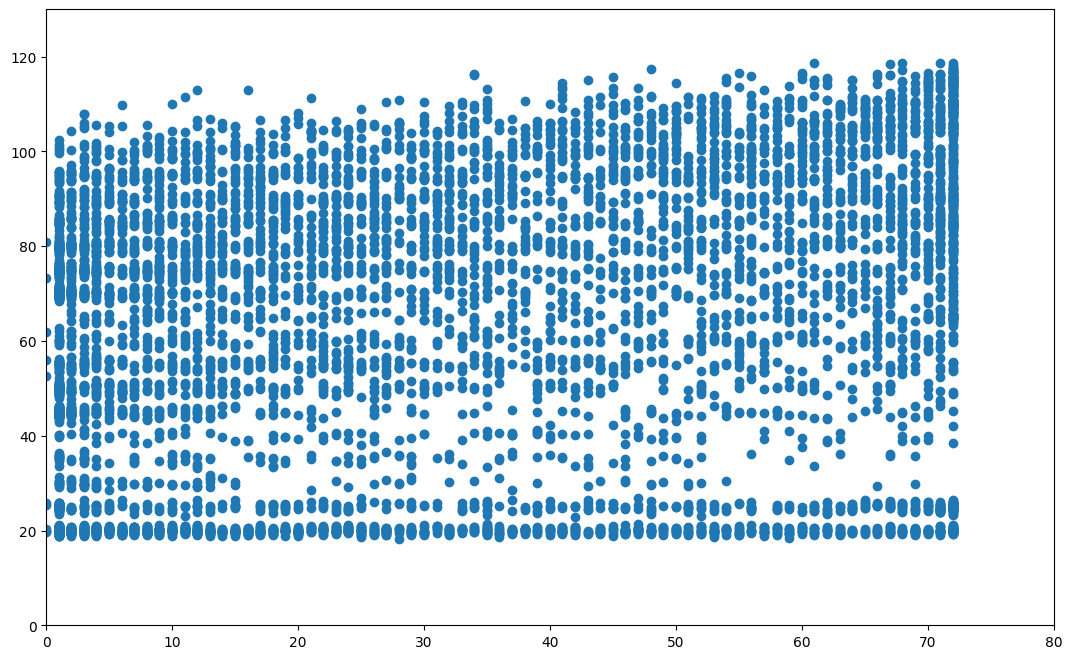

In [45]:
#creating a scatter plot with the tenure and monthly_charges columns. 
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.monthly_charges )
plt.ylim(0, 130)
plt.xlim(0, 80)
plt.show()

In [46]:
#using the stats.pearsonr function to calculate the Pearson correlation coefficient.
r, p = stats.pearsonr(tc.tenure, tc.monthly_charges)

In [47]:
r

0.24789985628615246

In [48]:
p

4.094044991476844e-99

In [49]:
#hypothesis test.
a = 0.05

if p < a:
    print('We reject the null hypothesis')

else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


b) Total charges?

Null hypothesis: There is no correlation between tenure and total charges in the population.

Alternative hypothesis: There is a correlation between tenure and total charges in the population.

In [51]:
#replacing all the blank spaces in the total_charges column with nan.
#changing the total_charges column to a float.
tc.total_charges = tc.total_charges.replace(' ', np.nan)
tc.total_charges = tc.total_charges.astype(float)

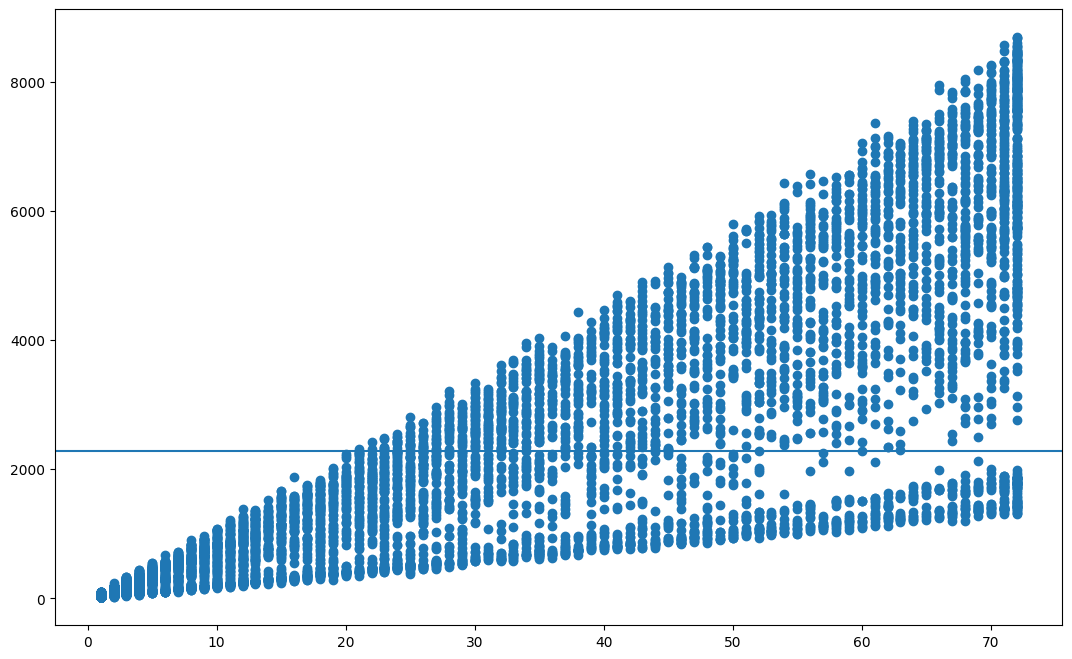

In [52]:
#creating a scatter plot with the tenure and total charges column
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.total_charges)
plt.axhline(y=np.nanmean(tc.total_charges))
plt.show()

In [53]:
#dropping rows with missing values in the tenure and total_charges columns from the DataFrame tc.
tc_cleaned = tc.dropna(subset=['tenure', 'total_charges'])

In [54]:
#using the stats.pearsonr function to calculate the Pearson correlation coefficient.
r, p = stats.pearsonr(tc_cleaned.tenure, tc_cleaned.total_charges)

In [55]:
p

0.0

In [56]:
#hypothesis test
a = 0.05

if p < a:
    print('We reject the null hypothesis')

else:
    print('We fail reject the null hypothesis')

We reject the null hypothesis


c) What happens if you control for phone and internet service?

Null hypothesis: There is no correlation between tenure and monthly charges in the population with phone service and DSL.

Alternative hypothesis: There is a correlation between tenure and monthly charges in the population with phone service and DSL.

In [57]:
#loading the telco_churn database
def get_db_url(database):
    return get_connection(database)

In [58]:
url = get_db_url('telco_churn')

In [59]:
engine =  create_engine(url)

In [60]:
#loading a query from sql.
query = '''
        SELECT tenure, phone_service, internet_service_type, monthly_charges, total_charges
        FROM customers
        LEFT JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
        WHERE phone_service = 'Yes' AND internet_service_type = 'DSL'
        '''

In [61]:
text_query = text(query)

In [62]:
#loading the tc table and calling the first first rows.
tc = pd.read_sql(text(query), engine.connect())
tc.head()

,tenure,phone_service,internet_service_type,monthly_charges,total_charges
0,9,Yes,DSL,65.60,593.3
1,9,Yes,DSL,59.90,542.4
2,9,Yes,DSL,69.40,571.45
3,7,Yes,DSL,48.20,340.35
4,65,Yes,DSL,90.45,5957.9


In [63]:
#replacing all the blank spaces in the total_charges column with nan.
#changing the total_charges column to a float. 
tc.total_charges = tc.total_charges.replace(' ', np.nan)
tc.total_charges = tc.total_charges.astype(float)

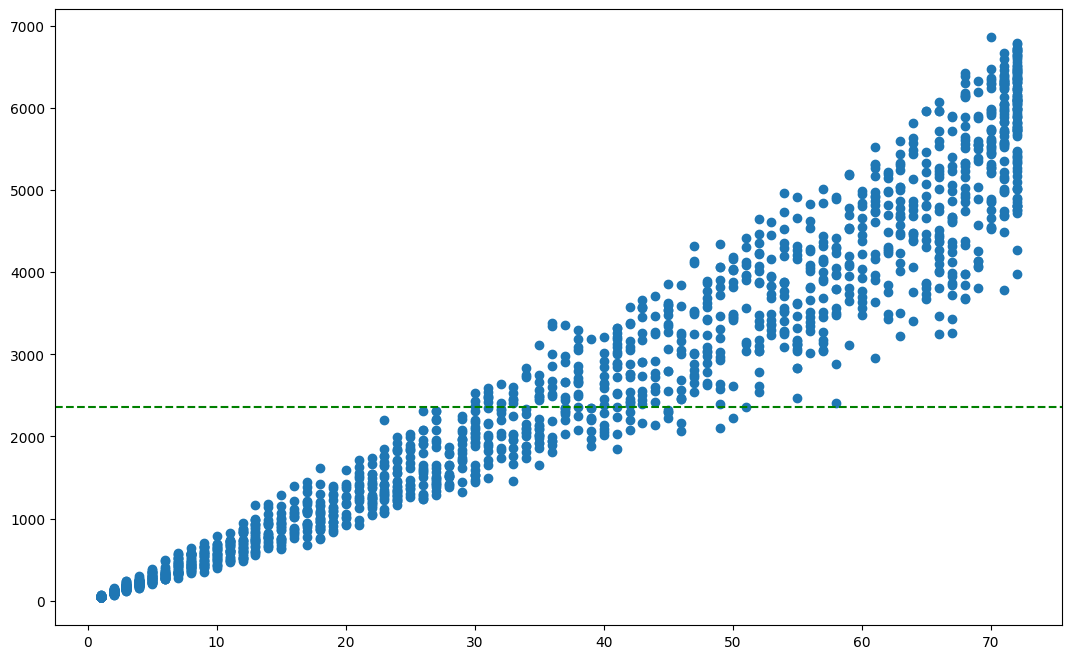

In [64]:
#creating a scatter plot with the tenure and total charges column
plt.figure(figsize=(13, 8))
plt.scatter(tc.tenure, tc.total_charges)
plt.axhline(y=np.nanmean(tc.total_charges), color='green', linestyle='--', label='Mean Total Charges')
plt.show()

In [65]:
#dropping rows with missing values in the tenure and total_charges columns from the DataFrame tc.
tc_cleaned = tc.dropna(subset=['tenure', 'total_charges'])

In [66]:
#using the stats.pearsonr function to calculate the Pearson correlation coefficient.
r, p = stats.pearsonr(tc_cleaned.tenure, tc_cleaned.tenure)

In [67]:
#hypothesis test
a = 0.05

if p < a:
    print('We reject the null hypothesis')

else:
    print('We fail reject the null hypothesis')

We reject the null hypothesis


3) Use the employees database.

In [68]:
#loading the employees database.
def get_db_url(database):
    return get_connection(database)

In [69]:
url = get_db_url('employees')

In [70]:
engine =  create_engine(url)

In [71]:
#loading a query from sql
query = '''
        SELECT dept_emp.emp_no, dept_emp.from_date, dept_emp.to_date, salary
        FROM dept_emp
        JOIN salaries ON salaries.emp_no = dept_emp.emp_no
        '''

In [72]:
text_query = text(query)

In [73]:
#loading the employees table and calling the first five rows
df = pd.read_sql(text(query), engine.connect())
df.head()

,emp_no,from_date,to_date,salary
0,10001,1986-06-26,9999-01-01,60117
1,10001,1986-06-26,9999-01-01,62102
2,10001,1986-06-26,9999-01-01,66074
3,10001,1986-06-26,9999-01-01,66596
4,10001,1986-06-26,9999-01-01,66961


a) Is there a relationship between how long an employee has been with the company and their salary?

Null hypothesis: There is no relationship between an employee's tenure and their salary in the population.

Alternative hypothesis: There is a relationship between an employee's tenure and their salary in the population.

In [74]:
#calling the max value from the from_date column
df.from_date.max()

datetime.date(2002, 8, 1)

In [75]:
#assigning the maximum value from the from_date column to the to_date column in order to eliminate the 9999-01-01 value
df.to_date = df.from_date.max()
df.head()

,emp_no,from_date,to_date,salary
0,10001,1986-06-26,2002-08-01,60117
1,10001,1986-06-26,2002-08-01,62102
2,10001,1986-06-26,2002-08-01,66074
3,10001,1986-06-26,2002-08-01,66596
4,10001,1986-06-26,2002-08-01,66961


In [76]:
#creating a new column called tenure from the difference between the to_date and from_date columns
df['tenure'] = df.to_date - df.from_date
df.head()

,emp_no,from_date,to_date,salary,tenure
0,10001,1986-06-26,2002-08-01,60117,"5880 days, 0:00:00"
1,10001,1986-06-26,2002-08-01,62102,"5880 days, 0:00:00"
2,10001,1986-06-26,2002-08-01,66074,"5880 days, 0:00:00"
3,10001,1986-06-26,2002-08-01,66596,"5880 days, 0:00:00"
4,10001,1986-06-26,2002-08-01,66961,"5880 days, 0:00:00"


In [77]:
#cannot convert the datetime value in the tenure column
df.tenure.astype(str)
df.tenure.dt.days

AttributeError: Can only use .dt accessor with datetimelike values

4) Use the sleepstudy data.

Is there a relationship between days and reaction time?

Null hypothesis: There is no relationship between days and reaction time.

Alternative hypothesis: There is a relationship between days and reaction time.

In [78]:
#loading the sleepstudy dataset
ss = data('sleepstudy')
ss.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


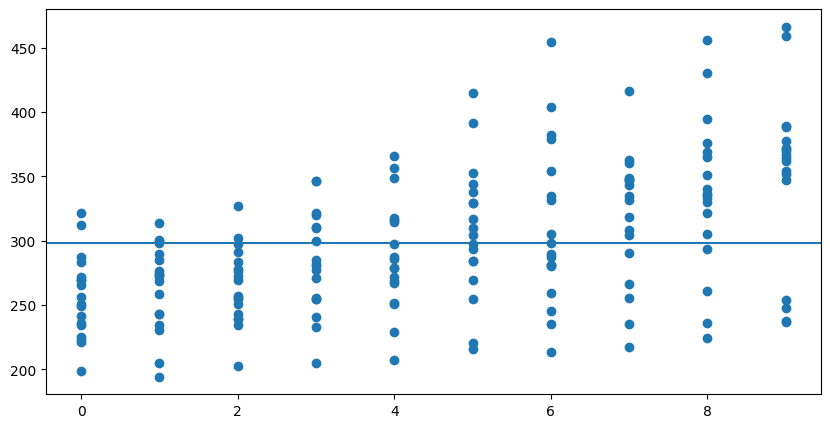

In [79]:
#creating a scatter plot with the days and reaction columns
plt.figure(figsize = (10, 5))
plt.scatter(ss.Days, ss.Reaction)
plt.axhline(y=np.nanmean(ss.Reaction))
plt.show()

In [80]:
#using the stats.pearsonr function to calculate the Pearson correlation coefficient.
r, p = stats.pearsonr(ss.Days, ss.Reaction)

In [81]:
p

9.894096322214486e-15

In [82]:
r

0.5352302262650255

In [83]:
#hypothesis test
a = 0.05

if p < a:
    print('We reject the null hypothesis')

else:
    print('We fail reject the null hypothesis')

We reject the null hypothesis


# Comparing Means

1) Answer with the type of test you would use (assume normal distribution):

a) Is there a difference in grades of students on the second floor compared to grades of all students?

1 sample 2 tailed test

b) Are adults who drink milk taller than adults who don't drink milk?

independent sample 1 tailed test

c) Is the price of gas higher in Texas or in New Mexico?

independent sample 1 tailed test

d) Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA test

2) Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Null hypothesis: The average time it takes to sells homes in both offices are the same.

Alternative hypothesis: There is a difference in the time it takes to sells homes in both offices.

In [84]:
#creating an rng and setting the seed value to 42
rng = np.random.default_rng(seed = 42)

In [85]:
#creating a normal distribution object using the stats.norm() function
office_one = stats.norm(90, 15)

In [86]:
#using the rvs function to create 40 random numbers
office_one_d = office_one.rvs(40)
office_one_d

array([ 76.98223739,  73.7563871 ,  72.51495767, 114.38863985,
       109.98876913,  78.44451658,  67.93940298,  64.6694003 ,
        89.55229195, 103.30060642,  63.73888793,  98.79956233,
        76.81802915,  85.4714242 ,  98.60498916, 108.74150795,
       119.45929409,  96.61717196,  69.29398298,  99.98190738,
        72.49229837,  98.77377761,  83.38716007,  80.70587248,
        96.68124642,  85.50078823, 100.54412529,  79.77684208,
       113.3140596 ,  73.26251292,  87.54157689,  72.39797489,
        89.9386927 , 114.33611603,  86.23167322,  97.02883374,
        83.77632909, 103.03332902,  93.94706304,  94.59188636])

In [87]:
#creating a normal distribution object using the stats.norm() function
office_two = stats.norm(100, 20)

In [88]:
#using the rvs function to create 50 random numbers
office_two_d = office_two.rvs(50)
office_two_d

array([ 90.6565367 ,  91.52778112,  94.59542868,  88.20168907,
        89.33098816, 100.17066077,  82.8598723 , 122.28890573,
        94.43197725,  85.68226006,  84.88111186,  94.98065348,
       119.63924322, 115.74857826,  91.43927732, 106.8491764 ,
        83.37695477,  81.59142512, 117.28201145, 175.32931574,
        72.95935915,  95.33229164, 132.06304548,  74.40888716,
        91.29346952, 109.20522077,  76.4381671 , 109.33523045,
        86.16176452, 143.40398565,  94.30779395,  90.73650332,
        63.38044844,  90.13418896,  76.67619065,  86.34434924,
       108.1799448 ,  77.68678452,  89.97200974,  83.42135315,
        96.63451669, 132.71686698,  74.84374872,  88.02350322,
       108.34259807, 128.40970103,  80.49186907,  72.91238562,
       118.58450008,  99.02270041])

In [89]:
#assigning vaalues to x, y1 and y2 for the parabolic graph
x = np.arange(40, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

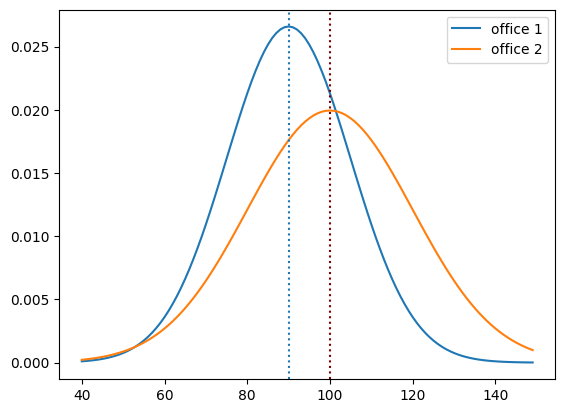

In [90]:
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='maroon')
plt.legend()
plt.show()

In [91]:
#using the ttest_ind() function to perform an independent two-sample t-test.
t, p = stats.ttest_ind(office_one_d, office_two_d)

In [92]:
t

-1.9930468297247181

In [93]:
p

0.049354249403227905

In [94]:
#hypothesis test
a = 0.05

if p < a :
    print('we reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


3) a) Load the mpg dataset and use it to answer the following questions:

In [95]:
#loading the mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


b) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Null hypothesis: There is no difference in fuel_efficiency in cars from 2008 vs 1999.

Alternate hypothesis: There is a difference in fuel_efficiency in cars from 2008 vs 1999.

In [96]:
#creating a new column, avg_mileage from the mean of the cty and hwy columns
mpg['avg_mileage'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [97]:
#assigning all the average mileages from cars produced in 2008 to cars_08
cars_08 = mpg[mpg['year'] == 2008].avg_mileage
cars_08.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mileage, dtype: float64

In [98]:
#assigning all the average mileages from cars produced in 1999 to cars_99
cars_99 = mpg[mpg['year'] == 1999].avg_mileage
cars_99.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mileage, dtype: float64

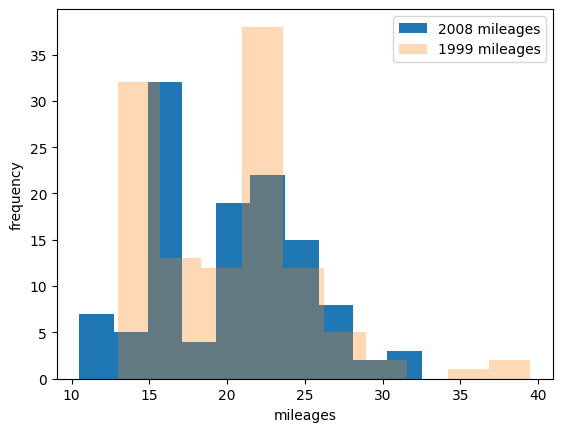

In [99]:
#creating a histogram from cars_08 and cars_99
plt.hist(cars_08, label = '2008 mileages')
plt.hist(cars_99, label = '1999 mileages', alpha = 0.3)
plt.xlabel('mileages')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [100]:
#using the ttest_ind() function to perform an independent two-sample t-test.
t_cars, p_cars = stats.ttest_ind(cars_08, cars_99)
t_cars, p_cars

(-0.21960177245940962, 0.8263744040323578)

In [101]:
#hypothesis test
a = 0.05

if t_cars > 0 and (p_cars/2 < a):
    print('we reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


c) Are compact cars more fuel-efficient than the average car?

Null hypothesis: Compact cars have the same fuel_effeciency as average cars.

Alternate hypothesis: Compact cars are more fuel_effecient than average cars.

In [102]:
#assigning all the average mileages from compact cars to com_cars
com_cars = mpg[mpg['class'] == 'compact'].avg_mileage
com_cars.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mileage, dtype: float64

In [103]:
#assigning the mean of the avg_mileage column to avg_cars
avg_car = mpg.avg_mileage.mean()
avg_car

20.14957264957265

In [105]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


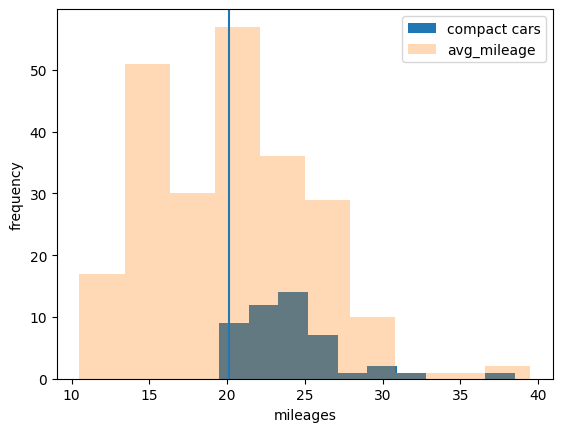

In [106]:
#creating a histogram from com_cars ang average mileage for all cars and made a line through the x-axis representing the mean of avg_cars
plt.hist(com_cars, label = 'compact cars')
plt.hist(mpg.avg_mileage, label = 'avg_mileage', alpha = 0.3)
plt.axvline(avg_car)
plt.xlabel('mileages')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [107]:
#using the stats.ttest_1samp() function to perform a one-sample t-test.
t, p = stats.ttest_1samp(com_cars, avg_car)
t, p

(7.896888573132533, 4.1985637943171486e-10)

In [108]:
#hypothesis test
a = 0.05

if p < a:
    print('we reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


d) Do manual cars get better gas mileage than automatic cars?

Null hypothesis: Manual cars have the same gas mileage as automatic cars.

Alternative hypothesis: Manual cars get better gas mileage than automatic cars.

In [109]:
#assigning all average mileages from cars with manual transmisions to man_cars
man_cars = mpg[mpg['trans'].str.startswith('manual')].avg_mileage
man_cars.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: avg_mileage, dtype: float64

In [110]:
#assigning all average mileages from cars with automatic transmisions to auto_cars
auto_cars = mpg[mpg['trans'].str.startswith('auto')].avg_mileage
auto_cars.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: avg_mileage, dtype: float64

In [111]:
#using the ttest_ind() function to perform an independent two-sample t-test.
t, p = stats.ttest_ind(man_cars, auto_cars)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [112]:
#hypothesis test
a = 0.05

if t > 0 and (p/2 < a):
    print('we reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


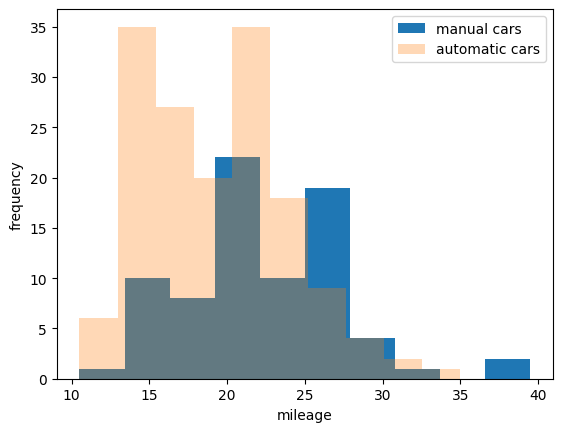

In [113]:
#creating a histogram from man_cars and auto_cars
plt.hist(man_cars, label = 'manual cars')
plt.hist(auto_cars, label = 'automatic cars', alpha = 0.3)
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.legend()
plt.show()